<a href="https://colab.research.google.com/github/timsyip/Queens-NY-Restaurant-Inspection-/blob/main/CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#New York City Deparment of Health Restaurant Inspection from 2021 - 2022

I will be looking at New York City Department of Health Restaurant Inspection between the time period of 1/1/2021 to 12/31/2022.

I want to answer 3 questions:



1.   Whats the most inspection by cuisine in Queens?
2.   What zip code had the most inspection in Queens?
3.   Which cuisine has the best and worst score in Queens?



[NYC Open Data DOH Restaurant Inspection](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j)


[Restaurant Inspection Result Look Up](https://a816-health.nyc.gov/ABCEatsRestaurants/#!/Search)







#Importing data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
uploaded = files.upload()
#importing the csv data
#importing libraries

Saving DOHMH_New_York_City_Restaurant_Inspection_Results.csv to DOHMH_New_York_City_Restaurant_Inspection_Results.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['DOHMH_New_York_City_Restaurant_Inspection_Results.csv']))
df

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point
0,50125809,XPIZZA,Manhattan,190,FRONT STREET,10038.0,9179224796,NaN,01/01/1900,NaN,...,NaN,40.706670,-74.004148,101.0,1.0,1502.0,1001162.0,1.000748e+09,MN25,NaN
1,50116882,NaN,Brooklyn,628,5 AVENUE,11215.0,9178323699,NaN,01/01/1900,NaN,...,NaN,40.663160,-73.991544,307.0,38.0,14300.0,3336719.0,3.006310e+09,BK37,NaN
2,50129957,PIZZA HUTT,Manhattan,973,8 AVENUE,10019.0,3477017760,NaN,01/01/1900,NaN,...,NaN,40.766812,-73.982809,104.0,3.0,13900.0,1076205.0,1.010488e+09,MN15,NaN
3,50123719,SWEET AND DELICIOUS,Brooklyn,200,WYCKOFF AVENUE,11237.0,19178701708,NaN,01/01/1900,NaN,...,NaN,40.701668,-73.914968,304.0,37.0,44100.0,3075497.0,3.033010e+09,BK77,NaN
4,50123677,CHEF GUO,Manhattan,135,EAST 50 STREET,10022.0,3475996064,NaN,01/01/1900,NaN,...,NaN,40.756322,-73.971940,106.0,4.0,10000.0,1036453.0,1.013050e+09,MN19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212833,41580537,TRATTORIA ZERO OTTO NOVE II,Manhattan,15,WEST 21 STREET,10010.0,2122420899,Italian,12/26/2018,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.740603,-73.991314,105.0,3.0,5800.0,1015531.0,1.008230e+09,MN13,NaN
212834,50113984,EVERETT LIBRARY CAFÉ,Manhattan,525,WEST 120 STREET,10027.0,2126783167,Coffee/Tea,08/20/2021,Violations were cited in the following area(s).,...,Pre-permit (Non-operational) / Initial Inspection,40.809710,-73.960090,109.0,7.0,20300.0,1088704.0,1.019750e+09,MN09,NaN
212835,50074371,EL BUEN GUSTO RESTAURANT,Brooklyn,5201,4 AVENUE,11220.0,7184926001,Spanish,01/27/2020,Establishment re-opened by DOHMH.,...,Cycle Inspection / Reopening Inspection,40.645255,-74.013823,307.0,38.0,7600.0,3013888.0,3.008070e+09,BK32,NaN
212836,40369213,WHITESTONE LANES,Queens,3005,WHITESTONE EXPRESSWAY,11354.0,7183536300,American,11/09/2018,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.770709,-73.833720,407.0,20.0,86900.0,4100748.0,4.043700e+09,QN22,NaN


#Viewing Data Types and Column names

In [ ]:
df.dtypes
#seeing all the column types and name

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board          float64
Council District         float64
Census Tract             float64
BIN                      float64
BBL                      float64
NTA                       object
Location Point           float64
dtype: object

In [ ]:
df.columns


Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point'],
      dtype='object')

#Cleaning Data

In [ ]:
Queens= df[df['BORO'] == 'Queens']
Queens
#creating a new dataframe for Queens

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point
8,50114495,NaN,Queens,16225,DEPOT RD,11358.0,9177678989,NaN,01/01/1900,NaN,...,NaN,40.761981,-73.802910,407.0,19.0,117100.0,4119562.0,4.052850e+09,QN51,NaN
11,50127017,NaN,Queens,4106,JUNCTION BLVD,11368.0,3476701384,NaN,01/01/1900,NaN,...,NaN,40.747368,-73.868505,404.0,21.0,46500.0,4039895.0,4.015980e+09,QN29,NaN
13,41194745,GOLDEN PALACE GOURMET,Queens,14009,CHERRRY AVENUE,NaN,7188864383,Chinese,02/15/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,4.000000e+00,NaN,NaN
15,50112717,SUNNY RIVERS,Queens,17007,JAMAICA AVE,11432.0,7186444531,NaN,01/01/1900,NaN,...,NaN,40.707265,-73.789414,412.0,27.0,46200.0,4209740.0,4.098040e+09,QN61,NaN
19,50125037,NaN,Queens,3520,FARRINGTON ST,11354.0,6466172558,NaN,01/01/1900,NaN,...,NaN,40.764102,-73.831647,407.0,20.0,86900.0,4458328.0,4.049580e+09,QN22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212822,50094135,MEGA FIT NUTRITION,Queens,3816,108TH ST,11368.0,9293306869,Other,04/18/2022,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Re-inspection,40.752101,-73.859487,403.0,21.0,40300.0,4044572.0,4.017750e+09,QN26,NaN
212823,50105901,YANG SAN DO,Queens,16519,NORTHERN BLVD,11358.0,3473684991,Korean,12/30/2021,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.760095,-73.801035,407.0,19.0,117500.0,4438194.0,4.053400e+09,QN51,NaN
212828,50011568,IL FALCO,Queens,2150,44TH DR,11101.0,7187070009,Italian,11/30/2018,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.748013,-73.946939,402.0,26.0,700.0,4000668.0,4.000780e+09,QN31,NaN
212831,50112862,LULU'S PIZZA,Queens,9118,59TH AVE,11373.0,5164992570,Pizza,08/01/2022,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Second Compliance I...,40.733942,-73.869784,404.0,25.0,68300.0,4559042.0,4.018610e+09,QN29,NaN


In [ ]:
drop_cols=['CAMIS','VIOLATION CODE','VIOLATION DESCRIPTION','CRITICAL FLAG','INSPECTION TYPE','Latitude','Longitude','Community Board','Council District','Census Tract','BIN','BBL','NTA','Location Point']
Queens.drop(drop_cols, inplace=True, axis=1)
Queens


#Dropping columns 'CAMIS','VIOLATION CODE','VIOLATION DESCRIPTION','CRITICAL FLAG','INSPECTION TYPE','Latitude','Longitude','Community Board','Council District','Census Tract','BIN','BBL','NTA','Location Point'

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,SCORE,GRADE,GRADE DATE,RECORD DATE
8,NaN,Queens,16225,DEPOT RD,11358.0,9177678989,NaN,01/01/1900,NaN,NaN,NaN,NaN,01/16/2023
11,NaN,Queens,4106,JUNCTION BLVD,11368.0,3476701384,NaN,01/01/1900,NaN,NaN,NaN,NaN,01/16/2023
13,GOLDEN PALACE GOURMET,Queens,14009,CHERRRY AVENUE,NaN,7188864383,Chinese,02/15/2022,Violations were cited in the following area(s).,24.0,NaN,NaN,01/16/2023
15,SUNNY RIVERS,Queens,17007,JAMAICA AVE,11432.0,7186444531,NaN,01/01/1900,NaN,NaN,NaN,NaN,01/16/2023
19,NaN,Queens,3520,FARRINGTON ST,11354.0,6466172558,NaN,01/01/1900,NaN,NaN,NaN,NaN,01/16/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212822,MEGA FIT NUTRITION,Queens,3816,108TH ST,11368.0,9293306869,Other,04/18/2022,Violations were cited in the following area(s).,0.0,A,04/18/2022,01/16/2023
212823,YANG SAN DO,Queens,16519,NORTHERN BLVD,11358.0,3473684991,Korean,12/30/2021,Violations were cited in the following area(s).,40.0,NaN,NaN,01/16/2023
212828,IL FALCO,Queens,2150,44TH DR,11101.0,7187070009,Italian,11/30/2018,Violations were cited in the following area(s).,20.0,NaN,NaN,01/16/2023
212831,LULU'S PIZZA,Queens,9118,59TH AVE,11373.0,5164992570,Pizza,08/01/2022,Violations were cited in the following area(s).,55.0,NaN,NaN,01/16/2023


In [ ]:
Queens['INSPECTION DATE']= pd.to_datetime(Queens['INSPECTION DATE'])
Queens['GRADE DATE']= pd.to_datetime(Queens['GRADE DATE'])
Queens['RECORD DATE']= pd.to_datetime(Queens['RECORD DATE'])

Queens.info()
#converting object to date time

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49996 entries, 8 to 212836
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DBA                  49588 non-null  object        
 1   BORO                 49996 non-null  object        
 2   BUILDING             49741 non-null  object        
 3   STREET               49996 non-null  object        
 4   ZIPCODE              49267 non-null  float64       
 5   PHONE                49995 non-null  object        
 6   CUISINE DESCRIPTION  49012 non-null  object        
 7   INSPECTION DATE      49996 non-null  datetime64[ns]
 8   ACTION               49012 non-null  object        
 9   SCORE                47577 non-null  float64       
 10  GRADE                24810 non-null  object        
 11  GRADE DATE           23019 non-null  datetime64[ns]
 12  RECORD DATE          49996 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(

<ipython-input-8-b397e166c882>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Queens['INSPECTION DATE']= pd.to_datetime(Queens['INSPECTION DATE'])
<ipython-input-8-b397e166c882>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Queens['GRADE DATE']= pd.to_datetime(Queens['GRADE DATE'])
<ipython-input-8-b397e166c882>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [ ]:
start_date = '01/01/2021'
end_date = '12/31/2022'
Queens2021 = Queens[(Queens['INSPECTION DATE'] >= start_date) & (Queens['INSPECTION DATE'] <= end_date)]
Queens2021
#finding all inspections between 01/21 and 12/22

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,SCORE,GRADE,GRADE DATE,RECORD DATE
13,GOLDEN PALACE GOURMET,Queens,14009,CHERRRY AVENUE,NaN,7188864383,Chinese,2022-02-15,Violations were cited in the following area(s).,24.0,NaN,NaT,2023-01-16
104,PANDA GARDEN QUEENS,Queens,5917,ROOSEVELT AVE,11377.0,7185058888,Chinese,2022-06-14,Violations were cited in the following area(s).,61.0,NaN,NaT,2023-01-16
141,CIELITO RESTAURANT,Queens,3302,36TH AVE,11106.0,9179128297,Mexican,2022-03-25,Violations were cited in the following area(s).,49.0,NaN,NaT,2023-01-16
157,NAPOLI'S BISTRO,Queens,2851,42ND ST,11103.0,3475310202,Italian,2022-01-06,Violations were cited in the following area(s).,13.0,A,2022-01-06,2023-01-16
191,ROLLY KIMBAB,Queens,6123,SPRINGFIELD BLVD,11364.0,3474084172,Korean,2022-12-02,Violations were cited in the following area(s).,28.0,NaN,NaT,2023-01-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212800,TERIYAKI MONSTER,Queens,4354,162ND ST,11358.0,7183210762,Chinese,2022-06-22,Violations were cited in the following area(s).,26.0,NaN,NaT,2023-01-16
212810,DELICIAS SECUENAS,Queens,580,SENECA AVENUE,11385.0,9176155382,Latin American,2022-12-15,Violations were cited in the following area(s).,22.0,N,NaT,2023-01-16
212822,MEGA FIT NUTRITION,Queens,3816,108TH ST,11368.0,9293306869,Other,2022-04-18,Violations were cited in the following area(s).,0.0,A,2022-04-18,2023-01-16
212823,YANG SAN DO,Queens,16519,NORTHERN BLVD,11358.0,3473684991,Korean,2021-12-30,Violations were cited in the following area(s).,40.0,NaN,NaT,2023-01-16


In [ ]:
Queens2021 = Queens2021.dropna(subset=['GRADE'])
Queens2021
#dropping NaN in Grades

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,SCORE,GRADE,GRADE DATE,RECORD DATE
157,NAPOLI'S BISTRO,Queens,2851,42ND ST,11103.0,3475310202,Italian,2022-01-06,Violations were cited in the following area(s).,13.0,A,2022-01-06,2023-01-16
228,EL BUEN SABOR 2,Queens,19801,JAMAICA AVE,11423.0,5167827937,Spanish,2021-09-22,Violations were cited in the following area(s).,13.0,A,2021-09-22,2023-01-16
237,"ALPHA, AWESOMESAUCE",Queens,4006,ASTORIA BLVD,11103.0,7187372607,American,2022-12-04,Violations were cited in the following area(s).,24.0,Z,2022-12-04,2023-01-16
278,DAE BAK RESTAURANT,Queens,14606,34 AVENUE,11354.0,7183580002,Korean,2022-03-01,Violations were cited in the following area(s).,13.0,A,2022-03-01,2023-01-16
362,NABANNO RESTAURANT,Queens,3722,73RD ST,11372.0,7187346000,Bangladeshi,2022-12-05,Violations were cited in the following area(s).,19.0,Z,2022-12-05,2023-01-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212755,SINGH'S ROTI SHOP & BAR,Queens,13118,LIBERTY AVENUE,11419.0,7183235990,Caribbean,2021-08-06,Violations were cited in the following area(s).,13.0,A,2021-08-06,2023-01-16
212766,SWEETGREEN,Queens,2535,44TH DR,11101.0,6317923780,Salads,2022-05-09,Violations were cited in the following area(s).,11.0,A,2022-05-09,2023-01-16
212792,Boishakhi Restaurant,Queens,7605,101ST AVE,11416.0,7185987080,Indian,2022-09-16,Violations were cited in the following area(s).,45.0,C,2022-09-16,2023-01-16
212810,DELICIAS SECUENAS,Queens,580,SENECA AVENUE,11385.0,9176155382,Latin American,2022-12-15,Violations were cited in the following area(s).,22.0,N,NaT,2023-01-16


In [ ]:
Grade_list = {'A': 5, 'B': 4 , 'C': 3, 'Z': 2, 'P':1, 'N': 0}
Queens2021['GRADE'] = Queens2021['GRADE'].replace(Grade_list)
Queens2021
#making the letter grades associated with a number
#not sure if this was helpful or not

<ipython-input-11-cbfdc166ca6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Queens2021['GRADE'] = Queens2021['GRADE'].replace(Grade_list)


,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,SCORE,GRADE,GRADE DATE,RECORD DATE
157,NAPOLI'S BISTRO,Queens,2851,42ND ST,11103.0,3475310202,Italian,2022-01-06,Violations were cited in the following area(s).,13.0,5,2022-01-06,2023-01-16
228,EL BUEN SABOR 2,Queens,19801,JAMAICA AVE,11423.0,5167827937,Spanish,2021-09-22,Violations were cited in the following area(s).,13.0,5,2021-09-22,2023-01-16
237,"ALPHA, AWESOMESAUCE",Queens,4006,ASTORIA BLVD,11103.0,7187372607,American,2022-12-04,Violations were cited in the following area(s).,24.0,2,2022-12-04,2023-01-16
278,DAE BAK RESTAURANT,Queens,14606,34 AVENUE,11354.0,7183580002,Korean,2022-03-01,Violations were cited in the following area(s).,13.0,5,2022-03-01,2023-01-16
362,NABANNO RESTAURANT,Queens,3722,73RD ST,11372.0,7187346000,Bangladeshi,2022-12-05,Violations were cited in the following area(s).,19.0,2,2022-12-05,2023-01-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212755,SINGH'S ROTI SHOP & BAR,Queens,13118,LIBERTY AVENUE,11419.0,7183235990,Caribbean,2021-08-06,Violations were cited in the following area(s).,13.0,5,2021-08-06,2023-01-16
212766,SWEETGREEN,Queens,2535,44TH DR,11101.0,6317923780,Salads,2022-05-09,Violations were cited in the following area(s).,11.0,5,2022-05-09,2023-01-16
212792,Boishakhi Restaurant,Queens,7605,101ST AVE,11416.0,7185987080,Indian,2022-09-16,Violations were cited in the following area(s).,45.0,3,2022-09-16,2023-01-16
212810,DELICIAS SECUENAS,Queens,580,SENECA AVENUE,11385.0,9176155382,Latin American,2022-12-15,Violations were cited in the following area(s).,22.0,0,NaT,2023-01-16


#Answering Questions

In [ ]:
QueensCG = Queens2021.groupby(['CUISINE DESCRIPTION'])['GRADE'].count().sort_values(ascending=False).reset_index().head(10)
QueensCG
#Seeing which cuisine had the most inspection during 2021-2022

,CUISINE DESCRIPTION,GRADE
0,Chinese,1595
1,American,1577
2,Pizza,847
3,Latin American,781
4,Bakery Products/Desserts,707
5,Coffee/Tea,636
6,Caribbean,594
7,Spanish,513
8,Mexican,431
9,Donuts,408


[Text(0, 0, 'Chinese'),
 Text(0, 0, 'American'),
 Text(0, 0, 'Pizza'),
 Text(0, 0, 'Latin American'),
 Text(0, 0, 'Bakery Products/Desserts'),
 Text(0, 0, 'Coffee/Tea'),
 Text(0, 0, 'Caribbean'),
 Text(0, 0, 'Spanish'),
 Text(0, 0, 'Mexican'),
 Text(0, 0, 'Donuts')]

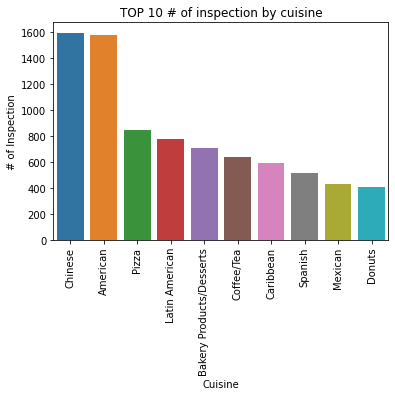

In [ ]:
sns.barplot(x='CUISINE DESCRIPTION', y='GRADE', data = QueensCG)
plt.xlabel('Cuisine')
plt.ylabel('# of Inspection')
plt.title('TOP 10 # of inspection by cuisine')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [ ]:
"""
QueensCG = Queens2021.groupby(['CUISINE DESCRIPTION'])['GRADE'].count().sort_values(ascending=False).reset_index().head(10)
QueensCG
"""

"\nQueensCG = Queens2021.groupby(['CUISINE DESCRIPTION'])['GRADE'].count().sort_values(ascending=False).reset_index().head(10)\nQueensCG\n"

In [ ]:
Queenszip = Queens2021.groupby(['ZIPCODE'])['GRADE'].count().sort_values(ascending=False).reset_index().head(10)
Queenszip
#Seeing the most amount inspection by zipcode

,ZIPCODE,GRADE
0,11354.0,863
1,11372.0,723
2,11385.0,679
3,11101.0,649
4,11368.0,597
5,11373.0,595
6,11103.0,521
7,11377.0,490
8,11375.0,457
9,11432.0,452


[Text(0, 0, '11354.0'),
 Text(0, 0, '11372.0'),
 Text(0, 0, '11385.0'),
 Text(0, 0, '11101.0'),
 Text(0, 0, '11368.0'),
 Text(0, 0, '11373.0'),
 Text(0, 0, '11103.0'),
 Text(0, 0, '11377.0'),
 Text(0, 0, '11375.0'),
 Text(0, 0, '11432.0')]

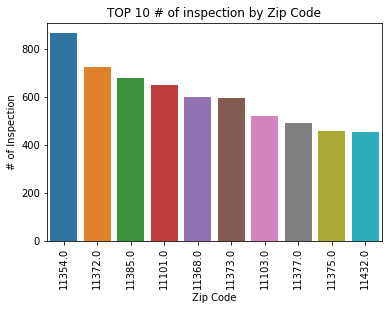

In [ ]:

sns.barplot(x='ZIPCODE', y='GRADE', data = Queenszip, order= Queenszip.ZIPCODE.value_counts().index)
plt.xlabel('Zip Code')
plt.ylabel('# of Inspection')
plt.title('TOP 10 # of inspection by Zip Code')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [ ]:
Queens2021.groupby(['CUISINE DESCRIPTION'])['SCORE'].mean().sort_values(ascending=False).reset_index()
#According to NYC DOH  "The lower the score, the better the grade."
#Seeing which cuisine had the worst/best score. 


,CUISINE DESCRIPTION,SCORE
0,Filipino,32.604938
1,Southeast Asian,28.300000
2,Bangladeshi,28.162162
3,African,23.476190
4,Chinese/Japanese,23.000000
...,...,...
71,Vegan,5.000000
72,Scandinavian,3.000000
73,Southwestern,2.000000
74,Fruits/Vegetables,0.583333


In [ ]:
Queensworst = Queens2021.groupby(['CUISINE DESCRIPTION'])['SCORE'].mean().sort_values(ascending=False).reset_index().head(20)
Queensworst

,CUISINE DESCRIPTION,SCORE
0,Filipino,32.604938
1,Southeast Asian,28.300000
2,Bangladeshi,28.162162
3,African,23.476190
4,Chinese/Japanese,23.000000
5,Peruvian,22.138686
6,Pakistani,21.705882
7,Asian/Asian Fusion,21.405738
8,Portuguese,21.266667
9,Barbecue,20.260870


[Text(0, 0, 'Filipino'),
 Text(0, 0, 'Southeast Asian'),
 Text(0, 0, 'Bangladeshi'),
 Text(0, 0, 'African'),
 Text(0, 0, 'Chinese/Japanese'),
 Text(0, 0, 'Peruvian'),
 Text(0, 0, 'Pakistani'),
 Text(0, 0, 'Asian/Asian Fusion'),
 Text(0, 0, 'Portuguese'),
 Text(0, 0, 'Barbecue'),
 Text(0, 0, 'Indian'),
 Text(0, 0, 'Bakery Products/Desserts'),
 Text(0, 0, 'Thai'),
 Text(0, 0, 'Latin American'),
 Text(0, 0, 'Spanish'),
 Text(0, 0, 'Korean'),
 Text(0, 0, 'Seafood'),
 Text(0, 0, 'Brazilian'),
 Text(0, 0, 'Jewish/Kosher'),
 Text(0, 0, 'Eastern European')]

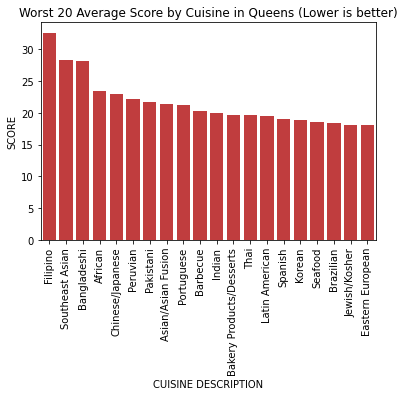

In [ ]:
sns.barplot(x='CUISINE DESCRIPTION', y='SCORE', data = Queensworst, color=sns.color_palette()[3])
plt.xlabel('CUISINE DESCRIPTION')
plt.ylabel('SCORE')
plt.title('Worst 20 Average Score by Cuisine in Queens (Lower is better)')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [ ]:
Queensbest= Queens2021.groupby(['CUISINE DESCRIPTION'])['SCORE'].mean().sort_values(ascending=True).reset_index().head(20)
Queensbest

,CUISINE DESCRIPTION,SCORE
0,Creole/Cajun,0.000000
1,Fruits/Vegetables,0.583333
2,Southwestern,2.000000
3,Scandinavian,3.000000
4,Vegan,5.000000
5,Polish,6.250000
6,Czech,7.400000
7,Chilean,7.500000
8,Donuts,9.199017
9,Not Listed/Not Applicable,9.750000


[Text(0, 0, 'Creole/Cajun'),
 Text(0, 0, 'Fruits/Vegetables'),
 Text(0, 0, 'Southwestern'),
 Text(0, 0, 'Scandinavian'),
 Text(0, 0, 'Vegan'),
 Text(0, 0, 'Polish'),
 Text(0, 0, 'Czech'),
 Text(0, 0, 'Chilean'),
 Text(0, 0, 'Donuts'),
 Text(0, 0, 'Not Listed/Not Applicable'),
 Text(0, 0, 'Salads'),
 Text(0, 0, 'Soups/Salads/Sandwiches'),
 Text(0, 0, 'Indonesian'),
 Text(0, 0, 'Cajun'),
 Text(0, 0, 'Moroccan'),
 Text(0, 0, 'Sandwiches'),
 Text(0, 0, 'Australian'),
 Text(0, 0, 'Tapas'),
 Text(0, 0, 'Soul Food'),
 Text(0, 0, 'Irish')]

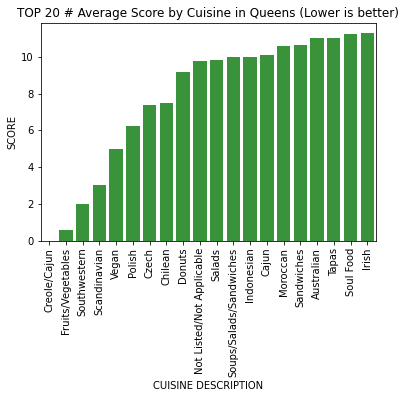

In [ ]:
sns.barplot(x='CUISINE DESCRIPTION', y='SCORE', data = Queensbest, color=sns.color_palette()[2])                                                                                           
plt.xlabel('CUISINE DESCRIPTION')
plt.ylabel('SCORE')
plt.title('TOP 20 # Average Score by Cuisine in Queens (Lower is better)')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
